<a href="https://colab.research.google.com/github/ms0753/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
student_data = pd.read_table('access_detail.csv',sep=',')
student_data.head()

,lecture_id,access_date,user_id
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34,78ff837c7cea9f33
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58,23182525e9996864
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:16,ffb6913842d617a5
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:59,2c6822e7e833dc95


In [4]:
print(type(student_data['access_date'][0]))

<class 'str'>


In [5]:
format = '%Y-%m-%dT%H:%M:%S.%f'
student_data['access_date_time'] = pd.to_datetime(student_data['access_date'], format='mixed')
student_data.tail(5)

,lecture_id,access_date,user_id,access_date_time
8123,5f36558829f38171335a890a,2020-09-03 22:37:33,6da398d852411234,2020-09-03 22:37:33
8124,5f36558829f38171335a890a,2020-08-29 11:09:58,6da398d852411235,2020-08-29 11:09:58
8125,5f36558829f38171335a890a,2020-09-06 12:25:25,6da398d852411236,2020-09-06 12:25:25
8126,5f36558829f38171335a890a,2020-09-07 22:11:20,6da398d852411237,2020-09-07 22:11:20
8127,5f36558829f38171335a890a,2020-08-22 21:12:23,6da398d852411238,2020-08-22 21:12:23


In [6]:
student_data['access_date_time_weekday'] = student_data['access_date_time'].dt.day_name()
student_data.tail(5)

,lecture_id,access_date,user_id,access_date_time,access_date_time_weekday
8123,5f36558829f38171335a890a,2020-09-03 22:37:33,6da398d852411234,2020-09-03 22:37:33,Thursday
8124,5f36558829f38171335a890a,2020-08-29 11:09:58,6da398d852411235,2020-08-29 11:09:58,Saturday
8125,5f36558829f38171335a890a,2020-09-06 12:25:25,6da398d852411236,2020-09-06 12:25:25,Sunday
8126,5f36558829f38171335a890a,2020-09-07 22:11:20,6da398d852411237,2020-09-07 22:11:20,Monday
8127,5f36558829f38171335a890a,2020-08-22 21:12:23,6da398d852411238,2020-08-22 21:12:23,Saturday


In [7]:
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = student_data.groupby('access_date_time_weekday')['user_id'].count()
weekdata

,user_id
access_date_time_weekday,
Friday,859
Monday,1354
Saturday,926
Sunday,1541
Thursday,937
Tuesday,1624
Wednesday,887


In [8]:
weekdata = weekdata.agg(weeks)
weekdata

,user_id
Monday,1354
Tuesday,1624
Wednesday,887
Thursday,937
Friday,859
Saturday,926
Sunday,1541


In [9]:
student_data['access_date_time_hour'] = student_data['access_date_time'].dt.hour

hourdata = student_data.groupby('access_date_time_hour')['user_id'].count()
hourdata = hourdata.sort_index()
hourdata

,user_id
access_date_time_hour,
0,343
1,197
2,144
3,123
4,65
5,50
6,62
7,84
8,126


In [10]:
import matplotlib.pyplot as plt
import numpy as np

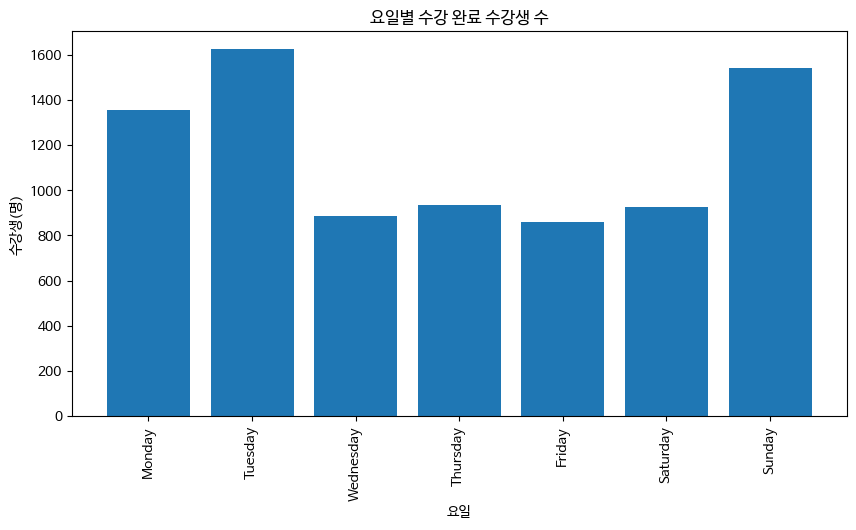

In [11]:
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')
plt.bar(weekdata.index, weekdata)
plt.title('요일별 수강 완료 수강생 수')
plt.xlabel('요일')
plt.ylabel('수강생(명)')
plt.xticks(rotation=90)
plt.show()

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache direc

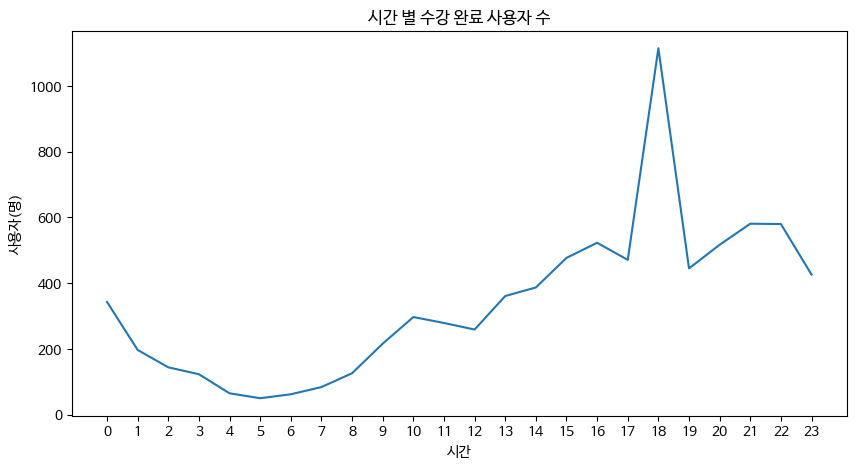

In [12]:
plt.figure(figsize=(10,5))
plt.plot(hourdata.index, hourdata)
plt.title('시간 별 수강 완료 사용자 수')
plt.xlabel('시간')
plt.ylabel('사용자(명)')
plt.xticks(np.arange(24))
plt.show()

In [13]:
student_data_pivot_table = pd.pivot_table(student_data, values='user_id', index = ['access_date_time_weekday'], columns = ['access_date_time_hour'], aggfunc = "count").agg(weeks)
student_data_pivot_table

access_date_time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,55,101,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86
Wednesday,47,19,12,8,10,15,14,3,22,20,...,34,68,40,68,80,71,56,75,82,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,46,69,80,60,61,61,70,62,94,65
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,45,45,47,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,47,70,52,37
Sunday,36,37,45,30,20,20,9,21,27,45,...,88,90,111,73,71,94,114,115,95,67


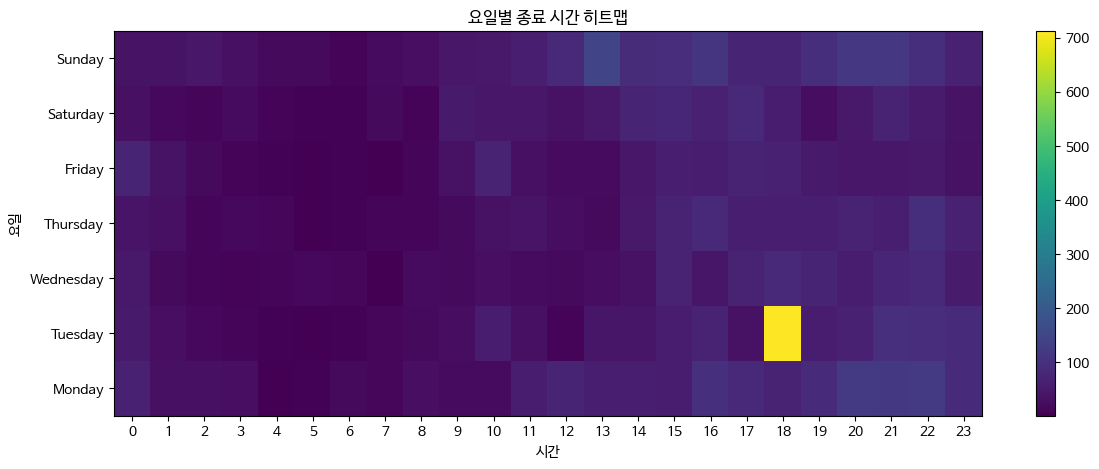

In [14]:
plt.figure(figsize=(14,5))
plt.pcolor(student_data_pivot_table)
plt.xticks(np.arange(0.5, len(student_data_pivot_table.columns), 1), student_data_pivot_table.columns)
plt.yticks(np.arange(0.5, len(student_data_pivot_table.index), 1), student_data_pivot_table.index)
plt.title('요일별 종료 시간 히트맵')
plt.xlabel('시간')
plt.ylabel('요일')
plt.colorbar()
plt.show()